In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data=pd.read_csv('Position_Salaries.csv')

In [30]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


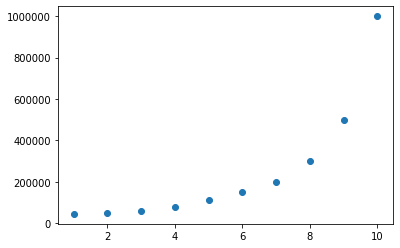

In [31]:
plt.scatter(data.Level,data.Salary)

## wont consider as a linear relation,so will use polynomial regression

In [32]:
X=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=6)

In [74]:
X_poly = poly.fit_transform(X_train)
print(X_poly.shape)
X_poly

(8, 7)


array([[1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03,
        1.68070e+04, 1.17649e+05],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04,
        1.00000e+05, 1.00000e+06],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02,
        3.12500e+03, 1.56250e+04],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02,
        1.02400e+03, 4.09600e+03],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
        3.27680e+04, 2.62144e+05],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01,
        3.20000e+01, 6.40000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01,
        2.43000e+02, 7.29000e+02],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00]])

In [75]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [76]:
L.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
X_test_poly =poly.fit_transform(X_test)

In [78]:
y_pred=L.predict(X_test_poly)

In [79]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score",r2_score(y_test,y_pred))
print("MSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.9928669711148248
MSE 14780.020622735661


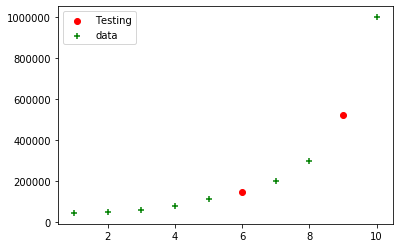

In [80]:
plt.scatter(X_test,y_pred, label="Testing",color='red')
plt.scatter(X_train, y_train, label="data", marker='+',color='green')
plt.legend()
plt.show()

In [101]:
def polynomialRegression(X,y,k=6):

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

  poly = PolynomialFeatures(degree=k)
  X_poly = poly.fit_transform(X_train)
  lr = LinearRegression()
  lr.fit(X_poly,y_train)
  
  X_test_poly =poly.fit_transform(X_test)
  y_pred=lr.predict(X_test_poly)

  training_score = r2_score(y_train, lr.predict(X_poly))
  test_score = r2_score(y_test,y_pred)
  
  return training_score, test_score

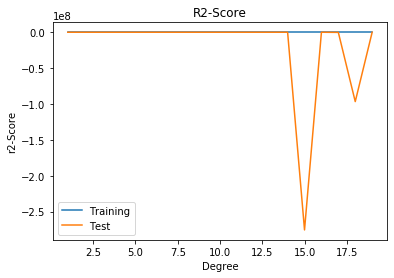

In [102]:
train=[]
test=[]
for i in range(1,20):
  r2train,r2test=polynomialRegression(X,y,k=i)
  train.append(r2train)
  test.append(r2test)
x=np.arange(19)+1
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("r2-Score")
plt.title("R2-Score");
plt.show()

# Because the difference is low b/n training error and testing error,we can choose degree 6 as the best value for degree parameter.